<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
Rows : 150, column : 5
Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


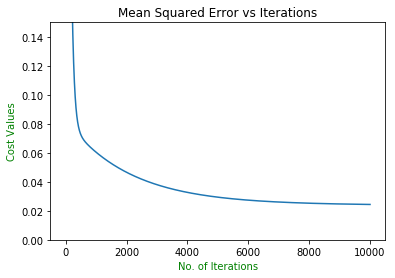

In [14]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt
data = pd.read_csv('iris.csv')
data.info()
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = data.drop(['species'], axis=1).values 
y = data.species.replace(mapping).values.reshape(rows,1) 

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

np.random.seed(0) 
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

iteration = 10000
learning_rate = 0.003 # alpha.
J = np.zeros(iteration) 

# Let's train our model to compute values of theta
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()